In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [10]:
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,0.882458
1,0.920793
2,0.904584
3,1.600855
4,0.833871


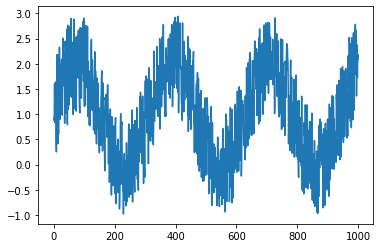

In [11]:
plt.plot(df)
plt.show() 

In [0]:
values=df.values
train, test = values[0:Tp,:], values[Tp:N,:]

In [13]:
train

array([[ 0.88245814],
       [ 0.92079309],
       [ 0.90458383],
       [ 1.6008554 ],
       [ 0.83387142],
       [ 1.46806784],
       [ 1.63803747],
       [ 1.40873112],
       [ 0.50480721],
       [ 0.25084459],
       [ 1.42794065],
       [ 2.18027247],
       [ 1.75589641],
       [ 1.80427852],
       [ 0.4111528 ],
       [ 1.48280779],
       [ 0.59429889],
       [ 2.1759556 ],
       [ 1.34467786],
       [ 2.32649137],
       [ 1.22674342],
       [ 0.89942618],
       [ 1.60668419],
       [ 1.97201811],
       [ 1.51382852],
       [ 1.80560764],
       [ 2.08881606],
       [ 1.32417282],
       [ 0.97952444],
       [ 1.85426527],
       [ 2.50998139],
       [ 1.56100906],
       [ 1.79458017],
       [ 1.88791368],
       [ 2.16257911],
       [ 2.23638373],
       [ 0.82005254],
       [ 1.54289505],
       [ 2.44676444],
       [ 2.17858526],
       [ 1.02010647],
       [ 1.29692878],
       [ 2.20135978],
       [ 2.68383051],
       [ 2.07243954],
       [ 0

In [0]:
step = 4
# add step elements into train and test
test = np.append(test, np.repeat(test[-1,], step))
train = np.append(train, np.repeat(train[-1,], step))

In [0]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)


In [17]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(800, 1, 4)

In [18]:
trainX

array([[[0.88245814, 0.92079309, 0.90458383, 1.6008554 ]],

       [[0.92079309, 0.90458383, 1.6008554 , 0.83387142]],

       [[0.90458383, 1.6008554 , 0.83387142, 1.46806784]],

       ...,

       [[0.15916063, 1.07950476, 1.25650631, 1.25650631]],

       [[1.07950476, 1.25650631, 1.25650631, 1.25650631]],

       [[1.25650631, 1.25650631, 1.25650631, 1.25650631]]])

In [19]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [20]:
model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)




Epoch 1/100





 - 1s - loss: 0.8875
Epoch 2/100
 - 0s - loss: 0.4145
Epoch 3/100
 - 0s - loss: 0.3944
Epoch 4/100
 - 0s - loss: 0.3875
Epoch 5/100
 - 0s - loss: 0.3822
Epoch 6/100
 - 0s - loss: 0.3799
Epoch 7/100
 - 0s - loss: 0.3785
Epoch 8/100
 - 0s - loss: 0.3793
Epoch 9/100
 - 0s - loss: 0.3746
Epoch 10/100
 - 0s - loss: 0.3759
Epoch 11/100
 - 0s - loss: 0.3726
Epoch 12/100
 - 0s - loss: 0.3760
Epoch 13/100
 - 0s - loss: 0.3727
Epoch 14/100
 - 0s - loss: 0.3715
Epoch 15/100
 - 0s - loss: 0.3771
Epoch 16/100
 - 0s - loss: 0.3717
Epoch 17/100
 - 0s - loss: 0.3697
Epoch 18/100
 - 0s - loss: 0.3732
Epoch 19/100
 - 0s - loss: 0.3706
Epoch 20/100
 - 0s - loss: 0.3720
Epoch 21/100
 - 0s - loss: 0.3702
Epoch 22/100
 - 0s - loss: 0.3735
Epoch 23/100
 - 0s - loss: 0.3719
Epoch 24/100
 - 0s - loss: 0.3716
Epoch 25/100
 - 0s - loss: 0.3717
Epoch 26/100
 - 0s - loss: 0.3703
Epoch 27/100
 - 0s - loss: 0.3684
Epoch 28/100
 - 0s - loss: 0.3705
Epoch 29/100
 - 0s - loss: 0.3685
Epoch 30/100
 -

In [23]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.3480078768730164


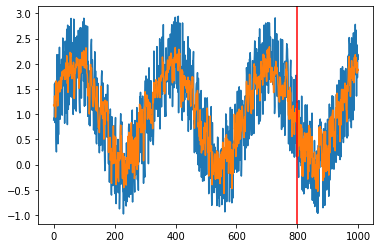

In [24]:
index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show() 